# Matrix Multplication Algorithms Analysis

# Table of Contents

1. [Abstract](#Abstract)
2. [Introduction](#Introduction)
3. [Objectives](#Objectives)
4. [Algorithms](#Algorithms)
    1. [Naive Method](#naive)
    2. [Strassen's Method](#strassen)
    3. [Dictionary Of Keys Representation Method](#DOK)
5. [Programming Languages](#languages)
6. [Benchmarks](#Benchmarks)
    1. [Matrices](#matrices)
    2. [Recordings](#recordings)
    3. [Analysis](#analysis)
7. [Conclusions](#Conclusions)
8. [Bibliography](#Bibliography)

# Abstract

In many cases and studies matrix multiplication is needed, that's why over time different methods have been created to solve the problems presented, with it, each method is specialized in a specific topical area. In this paper three methods will be analyzed, comparing their advantages and disadvantages and the time running different size matrices in three programming languages.

**Keywords:** Matrices, matrix multiplication, sparse matrix, Naive, Strassens, Dictionary Of Keys Representation, recursion, dynamic programming, time complexity, space complexity.

# Introduction

Given two matrices $A$ and $B$, each with $n$ rows and columns. Matrix multiplication is defined as the result of the dot product of every $ith$ row of matrix $A$ by each $jth$ column of matrix $B$. This operation yields a new matrix of $n^2$ dimmensions, where the $ijth$ position contains the product of the computations previously described.

**Common use cases for this kind of operation are:**

* Solving systems of linear equations.
* Solving intricate graph problems.
* Representing the logic gates applied in a quantum system.
* Applying rotations to projected objects in a 3D plane (Computer Graphics).

**Among many others.**

Despite being an extremely useful operation, it regretably can not be used in every desired scenario.<br/> 
Due to the nature of the operations required to calculate the resulting matrix. Cases where we deal with matrixes of great dimmensions rapidly become unfeasible, leaving a vast amount of problems unsolved. For this reason, it is always important to use efficient methods when dealing with great ammounts of data.

Merely reading, and writing operations of matrices take $O(n^2)$ time and space, setting a hard cap of $O(n^2)$ for any implementation of an algorithm aiming to do matrix multiplication. Nonetheless, in reality it is much worse, since time complexities for most algorithms range from approximately $O(n^{2.5})$ to $O(n^3)$. Because of this some algorithms also try to leverage parallelism in order speed up operations. However, improvements in performance do not increase a lot from there.

In this paper we will be analyzing various matrix multiplication algorithms, the logic behind them, and their performance in benchmarks using various programming languages.

# Objectives

* Describe the pros and cons of each matrix multiplication method.
* Compare the performance of each algorithm given an increase in the input size.
* Detect in which cases it is ideal to use each algorithm.
* Describe the principal characteristics and operation of each matrix multiplication method.

# Algorithms

Matrix multiplication have several implementations, some being more favorable to certain problems, others being applicable to only certain types of matrices. For the purpose of narrowing down our analysis, we will be focusing on three specific algorithms: 

1. Naive Algorithm.
2. Strassens Algorithm.
3. Dictionary Of Keys Representation.

While there are plenty of other algorithms that could arguably achieve a better performance than these, they were not selected because they were either theoretical algorithms, or too intricate to be analyzed in this paper.

The Naive algorithm was chosen because it is the base algorithm that defines matrix multiplication, so it was useful to know its efficiency and the changes made over time. The Strassens one was selected because it is the most common used, has many variations and it was important to compare the difference between efficiencies with respect to the Naive algorithm. And the Dictionary Of Keys Representation was chosen because it is useful for sparse matrices, so it was interesting to compare different types of solutions for different matrices.

In the following section a brief overview of each of the selected algorithms will be displayed.

## Naive Method <a name="naive"/>

Probably the simplest among all of the multiplication algorithms. It performs the inner product of each row by each column without any optimizations or caches. For square matrices, it's time complexity is considered to be $O(n^3)$.  

**Pseudo Code:**<br/>
<img align="center" width="600px" src="assets/naive_pseudocode.png"/>
<br/>**Pros:**<br/>
- Algorithm is easy to understand and implement.


<br/>**Cons:**<br/>
- $O(n^3)$ time complexity which hinders this algorithm's ability to compute big matrices.


**Another visualization for this algorithm is the following:<br/>**
<img align="center" width="700px" src="assets/matrix_multiplications.png"/>

Where $c1 = a1*b1 + a2*b4 + a3*b7$.




## Strassen's Method <a name="strassen"/>

Strassen's algorithm provides an optimization over the naive method by applying various strategies commonly known as dynamic programming, divide and conquer, and recursion. It is important to note that simply using divide and conquer will not improve the performance of this algorithm over the Naive method. It is the combination of all these methods which allows to reuse previously computed values.

Using a recursive dividing and conquer approach where A, B and C are square matrices, and a, b, c, d, e, f, g, h are submatrices, requires eight recursive calls as shown below: 

<img src="assets/naive_divide_and_conquer.png">
where $ae, bg, af, bh, ce, dg, cf, dh$ represent a recursive call. Each of this involving a submatrix multiplication.

On the other hand, Strassens strives for seven recursion calls by applying the following scheme:

<img src="assets/strassens_algorithm.png">

where $p1$ to $p7$ represent a recursive call involving the opperations shown above.

<br/>**Pros:**<br/>
- $O(n^{log7})$ time complexity which is slightly better than cubic complexity.


<br/>**Cons:**<br/>
- Submatrices in recursion take additional space.
- Larger errors accumulate using this method due to limited precision of computations.
- This algorithm can only be applied to square matrices.


## Dictionary Of Keys (DOK) Representation Method <a name="DOK"/>

Dictionary Of Keys Representation allows an optimization of the Naive method. It is especially useful for sparse matrices where the number of non-zero elements is relatively low when compared to number of total elements in the matrix.

**Example Dictionary of Keys(DOK) representation:**
<img src="./assets/sparse_matrix.png">


Instead of iterating over every index of a matrix, it iterates over the indexes and values of the dictionary representatiom.
For sparse matrices, this reduces time complexity from $O(n^3)$ to $O(n^2)$ and space complexity from $O(n^2)$ to $O(n)$. The reason behind this is that computations involving zero values are disregarded altogether.

# Programming Languages <a name="languages"/>

For the purpose of avoiding biases, and having a more broad perspective, we've chosen to run all of these algorithms in three different programming languages: **C++, Python, and Julia**. This will allow us to make a more accurate analysis after all of the benchmarks have been recorded.

These three languages were chosen because there is one compiled, one interpreted and one intermediate, so the purpose was to identify if there were any differences in efficiency between each algorithm if the language was changed.

The implementations for each of these algorithms may be found in the folder named after the corresponding programming language in the root of this repository.

# Benchmarks

## Matrices <a name="matrices"/>

All of the matrices used in this paper were taken from [https://sparse.tamu.edu/](https://sparse.tamu.edu/) in a .mtx format. Due to the constraints of strassens algorithm only square matrices with side $n = 2^k$ where $k \in N$.

They can be found in the ./matrices/ directory, and are described as follows:

| File | Number of rows and columns | Number of non-zero elements |
|---|---|---|
| Hamrle1.mtx | 32  | 98 |
| GD99_b.mtx | 64 | 252 |
| can_256.mtx | 256 | 2916 |
| dwa512.mtx | 512 | 2480 |
| delaunay_n10.mtx | 1024 | 6112 |


Matrix sizes ranging from $2^5$ to $2^{10}$ were chosen when selecting to matrices in order to observe how execution times increase when running our benchmarks. Bigger sizes were not selected as these problems quickly become slow to compute. Thus, it is unfeasible to process them because we established that each algorithm must be run multiple times for each matrix. Similarly, number of non-zero elements range from 98 to 6112. 

## Recordings <a name="recordings"/>

In order to facilitate the analysis of data, we've decided to track all of our benchmarks in the benchmarks.csv file. Each of the algorithm's implementations will write to this file for every matrix multiplication mentioned above 5 times. This in turn will give us an average which will be a good representation of how each algorithm performs in each situation.

As an additional note, it is important to mention that each matrix is multiplied by itself, as in some cases it was not possible to find multiple matrices of the same size.

## Analysis <a name="analysis"/>

Initially, we start by loading our benchmark times recorded by our implementations in cpp, python and julia. For the purpose of filtering and analyzing the data we'll be using pandas.

In [2]:
import pandas as pd
# load data from benchmarks.csv
dataframe = pd.read_csv("benchmarks.csv")

dataframe

,language,algorithm,matrix,matrix_size,time
0,cpp,sparse,Hamrle1.mtx,32,0.0000
1,cpp,sparse,Hamrle1.mtx,32,0.0000
2,cpp,sparse,Hamrle1.mtx,32,0.0000
3,cpp,sparse,Hamrle1.mtx,32,0.0000
4,cpp,sparse,Hamrle1.mtx,32,0.0000
...,...,...,...,...,...
220,julia,strassen,delaunay_n10.mtx,1024,653536.8431
221,julia,strassen,delaunay_n10.mtx,1024,630960.7846
222,julia,strassen,delaunay_n10.mtx,1024,620190.5979
223,julia,strassen,delaunay_n10.mtx,1024,566462.9464


As a first step we will filter by programming language, algorithm, and by matrix.

In [3]:
def parse_data(language, dataframe):
    measurements = dataframe[dataframe["language"] == language]
    columns = dataframe.columns
    dfs = []
    for algorithm in measurements.algorithm.unique():
        tmp_df = measurements[measurements["algorithm"] == algorithm]
        algorithm_dataframes = []
        for matrix in measurements.matrix.unique():
            matrix_df = tmp_df[tmp_df["matrix"] == matrix]
            algorithm_dataframes.append([
                matrix_df.iloc[0]["language"], 
                matrix_df.iloc[0]["algorithm"], 
                matrix_df.iloc[0]["matrix"], 
                matrix_df.iloc[0]["matrix_size"], 
                matrix_df.iloc[0]["time"].mean() 
            ])
        dfs.append(pd.DataFrame(algorithm_dataframes, columns=columns))
    return dfs

As mentioned above, each algorithm was recorded 5 times per matrix, per programming language. In this function we discriminate each dataframe by the algorithm implemented in each case. Consequently, we want to reduce these recordings to an average time in each case, and create a brand new dataframe with our new entries.

This is done this way, in order to obtain a more general perspective of the performance  from any particular execution of the algorithm.

In [4]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np
import random


python_dfs = parse_data("python", dataframe)
cpp_dfs = parse_data("cpp", dataframe)
julia_dfs = parse_data("julia", dataframe)


def plot_language(dataframes):
    x = np.linspace(32, 1024, num=200, endpoint=True)
    _, ax = plt.subplots(figsize=(10, 6))
    for df in dataframes:
        f = CubicSpline(df["matrix_size"], df["time"])
        ax.plot(
            x,
            f(x),
            linestyle='solid',
            label=f'{df.iloc[0]["algorithm"]} cubic splines',
            color="#%06x" % random.randint(0, 0xFFFFFF),  # generate random color
            linewidth=2.5
        )
        ax.plot(
            df["matrix_size"],
            df["time"],
            linestyle='dotted',
            label=f'{df.iloc[0]["algorithm"]} discrete',
            marker='o',
            color="#%06x" % random.randint(0, 0xFFFFFF),  # generate random color
            linewidth=2.5
        )
    plt.grid(True)
    plt.tight_layout()
    ax.set_title(f'Matrix multiplication behavior in {dataframes[0].iloc[0]["language"]}')
    ax.set_xlabel('Matrix Size', labelpad=5)
    ax.set_ylabel("Time (ms)")
    ax.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        fancybox=True,
        shadow=True, ncol=1
    )
    plt.show()

In the code snippet above we graph a dataframe for a specific language for each of the 5 selected matrices. 
Each graphic contains a plot of the discrete points in the dataframe, and an interpolated function (cubic splines) of those same points, to observe the behavior of the algorithms as the input grows in an easier to visualize way.

The graphic itself shows the relation between matrix size and time taken by each algorithm.

 Results are as follows:

### Python

Among all of our benchmarks, these were the longest to run, taking well over one million milliseconds in the worst case scenarios (or about 17 minutes). Due to the magnitude of strassen's algorithm records, naive and dictionary of keys representation method measurements are dwarfed in comparison.

As seen in the graph below, dictionary of keys representation almost ressembles a linear function, where in reality it grows in a square fashion.

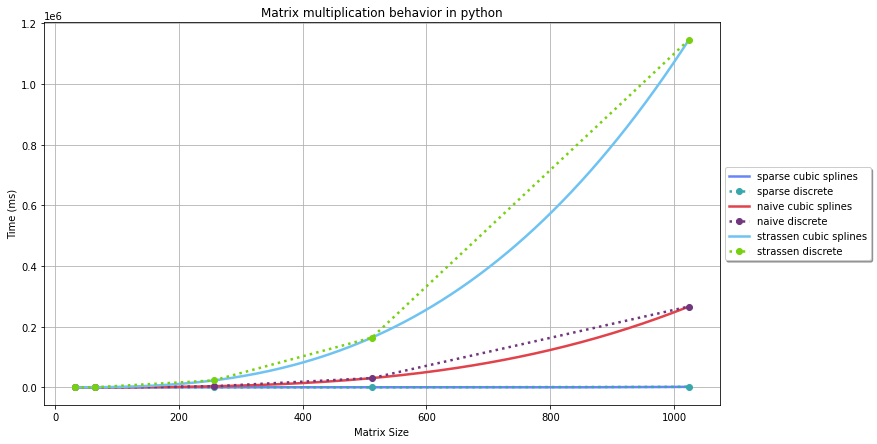

In [5]:
plot_language(python_dfs)

### C++

Unsurprisingly, times recorded for algorithms written in C++, were the fastest among all. Ranging from zero to roughly two hundred thousand milliseconds. Similarly to python, we see a trend where dictionary of keys representation method leads in performance, followed by the naive algorithm, and the strassen's method.

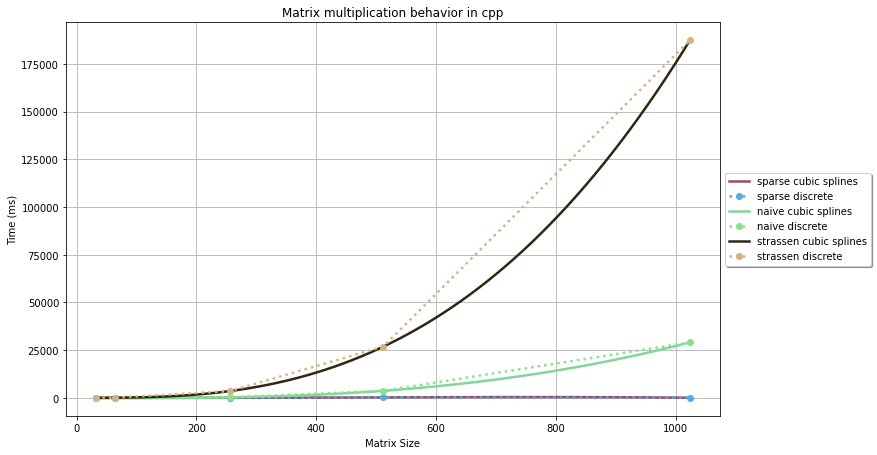

In [7]:
plot_language(cpp_dfs) 

### Julia

In constrast to to other benchmarks, we can see an interesting behavior between naive and dictionary of keys representation method. For smaller matrices, dictionary of keys representation method performed slightly worse.

A possible explaination for this unusual behavior is the fact that julia counts with native types for various matrices, including sparse and symetric matrices, which were used in the naive implementaton. This in turn may speed up execution times for some of the recordings as those types may be optimized for iteration, and arithmetic operations.

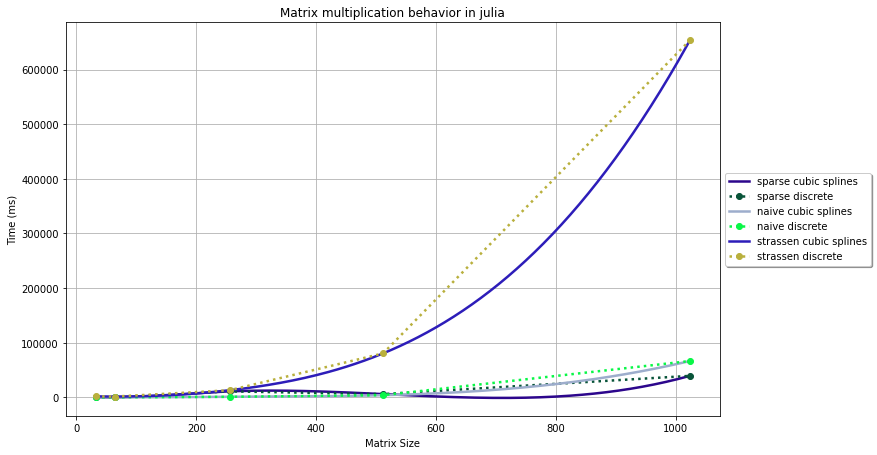

In [8]:
plot_language(julia_dfs)

#### Overall Behavior

Despite having a superior algorithmic complexity of aproximately $O(n^{2.8})$ we observe a trend of inferior performance in strassen's algorithm compared to that of the naive method, where the time taken by the method grows in a cubic fashion $O(n^3)$.
We suspect that this may be caused due to the fact that the matrices chosen for these benchmarks are relatively small (biggest being 1024 rows and columns). If it were possible to compare them using bigger matrices, we suspect that the superior complexity of strassens would kick in.

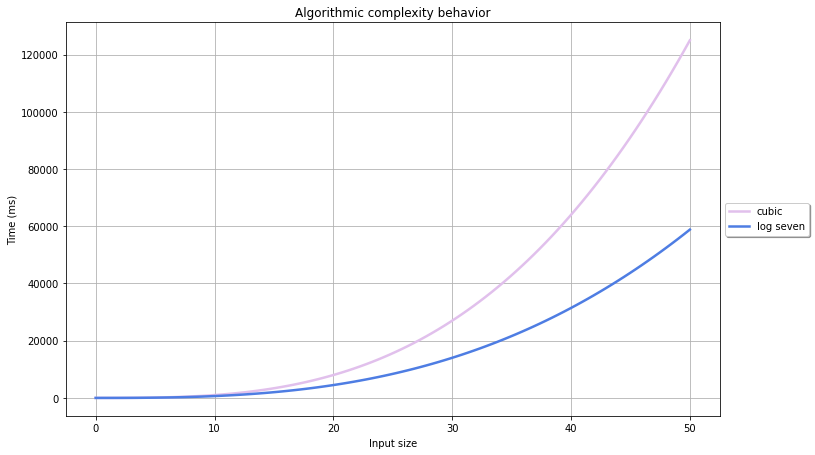

In [9]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import numpy as np
import random
import math

def cubic_complexity(x):
    return list(map(lambda y: y ** 3, x))

def log_seven_complexity(x):
    return list(map(lambda y : y ** math.log(7, 2), x))

x = np.linspace(0, 50, num=100, endpoint=True)
_, ax = plt.subplots(figsize=(10, 6))


ax.plot(
    x,
    cubic_complexity(x),
    linestyle='solid',
    label='cubic',
    color="#%06x" % random.randint(0, 0xFFFFFF),  # generate random color
    linewidth=2.5
)

ax.plot(
    x,
    log_seven_complexity(x),
    linestyle='solid',
    label='log seven',
    color="#%06x" % random.randint(0, 0xFFFFFF),  # generate random color
    linewidth=2.5
)

plt.grid(True)
plt.tight_layout()
ax.set_title("Algorithmic complexity behavior")
ax.set_xlabel('Input size', labelpad=5)
ax.set_ylabel("Time (ms)")
ax.legend(
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fancybox=True,
    shadow=True, ncol=1
)
plt.show()

In the graph we can see that for some of the initial values, the functions overlap. Leading us to believe that for some initial values, log seven complexity is greater than cubic.

We can run a quick check on our projections along the y axis to verify whether a value in the $O(n^{log7})$ is greater than the corresponding value in the cubic function.

In [10]:
answer = any(list(map(lambda x: (x[0] > x[1]), zip(log_seven_complexity(x), cubic_complexity(x)))))
print("O(N^2.8) is greater than O(N^3) at some point: ", answer)

O(N^2.8) is greater than O(N^3) at some point:  True


As we expected, for some of the initial values in the graph, the cubic function is overtaken by log seven function. For what we are trying to analyze, this implies that for smaller matrices, strassen's algorithm may not be an ideal option in comparison to the naive alternative. Nonetheless, bigger matrices may see a big advtage in this numerical method.

#### Language to Language Behavior

Comparing the benchmarks of an interpreted language with those of an intermediate and compiled one yielded interesting results. As expected, **Python** being an interpreted language, performed the worst among all. However, it is interesting to note that, despite falling behind **C++**, **Julia** did get close for some of the algorithms. Some reaching a performance of 4x times the time of **C++**. Which, all things considered, is impressive for implementations that were not typed in an optimized way. It would be interesting to run another set of benchmarks with better optimized implementations of these algorithms.

#### Naive vs Strassen

As a recursive algorithm. Strassen method itself relies on naive multiplication for part of its base case. In other words, when in the recursion calls a $1 x 1$ matrix is found, naive multiplication is used.

From our research, we discovered that a way to speed up strassen's algorithm is to increase the threshold at which naive multiplication is executed in order to prevent recursive calls that will not split matrices in big quantities (i.e. going from a $32 x 32$ matrix to a $16 x 16$).

In the following code snippet, we will display the behavior when said optimization is applied for the **C++** method.

In [23]:
import pandas as pd

dataframe = pd.read_csv("benchmarks.csv")
naive_df = dataframe[dataframe["algorithm"] == "naive"]
strassen_df = dataframe[dataframe["algorithm"] == "strassen"]
strassen_hybrid_df = pd.read_csv("strassen-hybrid.csv")

Initially, we start by loading and filtering our pandas dataframes.

In [24]:
processed_naive_df = parse_data("cpp", naive_df)
processed_strassen_df = parse_data("cpp", strassen_df)
processed_strassen_hybrid_df = parse_data("cpp", strassen_hybrid_df)

We process our dataframes with the function parse_data defined above

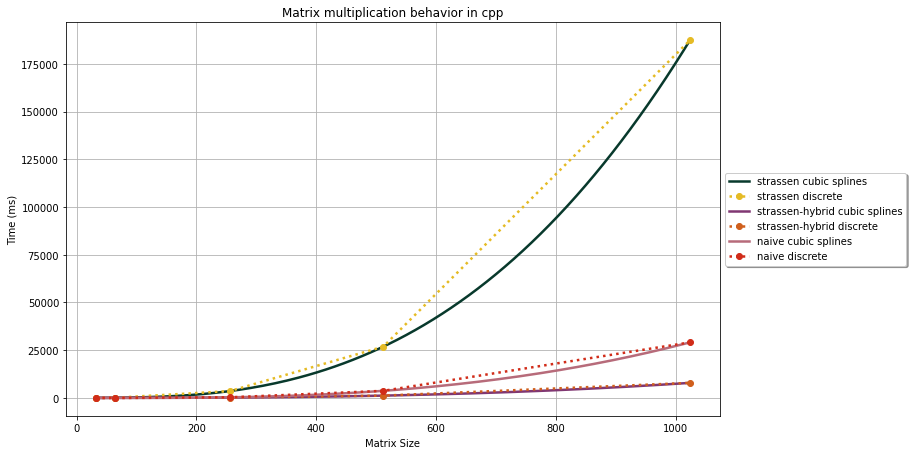

In [25]:
dfs = [processed_strassen_df[0], processed_strassen_hybrid_df[0], processed_naive_df[0]]
plot_language(dfs)

Lastly, we plot the data.

Unsurprisingly, cutting these marginal operations that are more optimal with the naive algorithm makes the strassen's method way more efficient than the regular implementation. In addition, it is interesting to see that algorithmic complexity behaviors (mentioned above) of $O(n^{2.8})$ vs $O(n^3)$ no longer occur.

It beats the naive implementation by a good chunk. Making it a good replacement due it its optimizations.

# Conclusions

# Bibliography

https://www.baeldung.com/cs/matrix-multiplication-algorithms
    
https://www.geeksforgeeks.org/strassens-matrix-multiplication/

https://www.baeldung.com/cs/matrix-multiplication-algorithms
    
https://bitsploit.blogspot.com/2017/07/optimizing-matrix-multiplication-using.html
    
https://andrew.gibiansky.com/blog/mathematics/matrix-multiplication/
    
https://rosettacode.org/wiki/Strassen%27s_algorithm
    
https://www.kkhaydarov.com/matrix-multiplication-algorithms/
    
https://martin-thoma.com/matrix-multiplication-python-java-cpp/
    
https://github.com/jaeho3690/Matrix_multiplication_python
    
https://medium.com/swlh/strassens-matrix-multiplication-algorithm-936f42c2b344